# Automated Sunspot Detection Using Morphological Operators
This notebook provides an algorithm for segmenting sunspots on H-Alpha images from the Coimbra Observatory (OGAUC) and AIA 1600 images from the Solar Dynamics Observatory (SDO). The segmentation is based on mathematical morphology operators, a powerful tool in image processing.

## Introduction

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. These regions are crucial for understanding solar activity, as they are associated with solar flares and other energetic events that can impact space weather and terrestrial communications. The accurate detection and analysis of sunspots are therefore essential for both scientific research and practical applications in space weather forecasting.

Traditionally, sunspot detection has been performed manually by experts, which is a time-consuming and subjective process. With the advent of advanced imaging technologies and the availability of high-resolution solar images from observatories like the Coimbra Observatory (OGAUC) and the Solar Dynamics Observatory (SDO), there is a growing need for automated methods to reliably detect and analyze sunspots.

This project aims to develop an automated algorithm for sunspot detection using a combination of mathematical morphology operators and image processing techniques. By leveraging these methods, we can enhance, segment, and analyze sunspot features in H-Alpha images from OGAUC and AIA 1600 images from SDO. The proposed approach not only improves the accuracy and efficiency of sunspot detection but also lays the groundwork for real-time monitoring and analysis of solar activity.

### Objectives

1. **Enhance Image Quality**: Apply various filtering techniques to reduce noise and improve the contrast of solar images, making sunspots more distinguishable.
2. **Segment Sunspots**: Utilize morphological operations and thresholding methods to accurately segment sunspots from the solar disk.
3. **Edge Detection**: Implement edge detection algorithms to highlight the boundaries of sunspots, aiding in precise segmentation.
4. **Analyze Segmented Regions**: Perform post-processing steps to label and analyze connected components, providing detailed information about sunspot properties such as area and perimeter.
5. **Develop a Robust Pipeline**: Combine multiple image processing techniques to create a comprehensive and reliable pipeline for automated sunspot detection.

### Approach

The algorithm leverages several image processing techniques:

- **Gaussian Blur** and **Median Blur** to reduce noise.
- **CLAHE (Contrast Limited Adaptive Histogram Equalization)** to enhance contrast.
- **Top-Hat and Black-Hat Transformations** to highlight bright and dark features, respectively.
- **Sobel and Laplacian Filters** for edge detection.
- **Adaptive Thresholding** and **Otsu's Thresholding** for segmentation.
- **Morphological Operations** such as dilation and erosion to refine segmented regions.
- **Connected Components Analysis** and **Contour Detection** for detailed analysis of sunspot regions.

### Significance

The successful implementation of this automated sunspot detection algorithm has several significant implications:

- **Efficiency**: Automated detection reduces the time and effort required for manual analysis.
- **Accuracy**: Consistent application of image processing techniques improves detection accuracy and reliability.
- **Real-time Monitoring**: The algorithm can be adapted for real-time processing, facilitating timely monitoring of solar activity.
- **Space Weather Research**: Enhanced detection and analysis of sunspots contribute to a better understanding of solar phenomena and their impact on space weather.

By integrating advanced image processing techniques with morphological operations, this project provides a robust and scalable solution for sunspot detection, paving the way for future research and applications in solar physics and space weather forecasting.

#### Step 1: Reading and Displaying the Input Image
First, we need to read and display the input image. The images provided for testing the algorithm are:

1. 2014oct23_CN_OGAUC
2. 2014oct23_HMI_SDO
3. 2014nov29_CN_OGAUC
4. 2014nov29_HMI_SDO

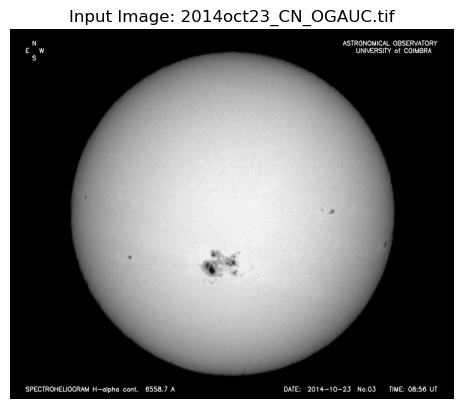

In [3]:
import cv2
import matplotlib.pyplot as plt

# Function to read and display an image
def read_and_display_image(image_name):
    img_in = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_in, cmap='gray')
    plt.title(f'Input Image: {image_name}')
    plt.axis('off')
    plt.show()
    return img_in

# Example: Read and display the first test image
image_name = '2014oct23_CN_OGAUC'
img_in = read_and_display_image(f'{image_name}.tif')  # Assuming the images are in the same directory with .jpg extension

#### Step 2: Applying Morphological Operations
Mathematical morphology operations such as dilation, erosion, opening, and closing are essential for image segmentation tasks. In this context, we will use these operations to enhance and detect sunspots.

**Dilation and Erosion**
- Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries.

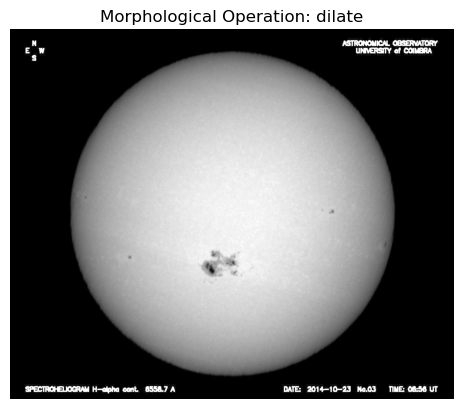

In [4]:
# Function to apply morphological operations
def apply_morphological_operations(img_in, operation, kernel_size=3):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    
    if operation == 'dilate':
        morphed_img = cv2.dilate(img_in, kernel, iterations=1)
    elif operation == 'erode':
        morphed_img = cv2.erode(img_in, kernel, iterations=1)
    elif operation == 'open':
        morphed_img = cv2.morphologyEx(img_in, cv2.MORPH_OPEN, kernel)
    elif operation == 'close':
        morphed_img = cv2.morphologyEx(img_in, cv2.MORPH_CLOSE, kernel)
    
    plt.imshow(morphed_img, cmap='gray')
    plt.title(f'Morphological Operation: {operation}')
    plt.axis('off')
    plt.show()
    
    return morphed_img

# Example: Apply dilation
operation = 'dilate'
dilated_img = apply_morphological_operations(img_in, operation)

#### Pre-Processing

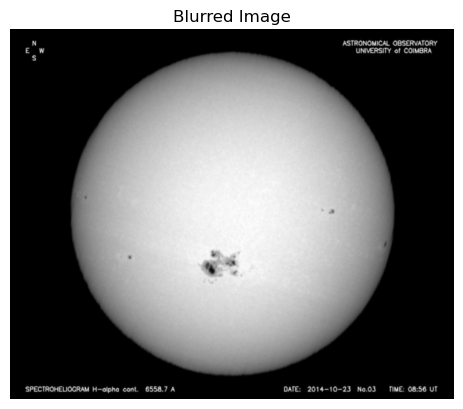

In [5]:
# Applying Gaussian Blur to reduce noise
def preprocess_image(img_in):
    blurred_img = cv2.GaussianBlur(img_in, (5, 5), 0)
    plt.imshow(blurred_img, cmap='gray')
    plt.title('Blurred Image')
    plt.axis('off')
    plt.show()
    return blurred_img

blurred_img = preprocess_image(img_in)

#### Threshold

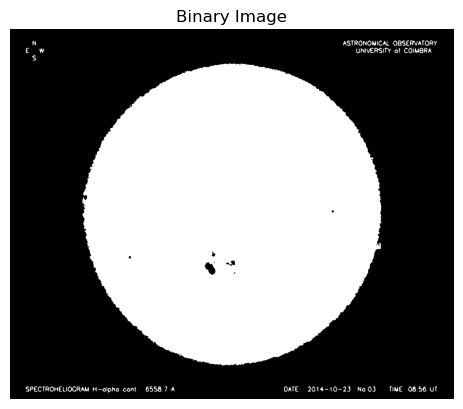

In [6]:
def apply_threshold(img_in):
    _, binary_img = cv2.threshold(img_in, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')
    plt.show()
    return binary_img

binary_img = apply_threshold(blurred_img)

#### Morphological Operation

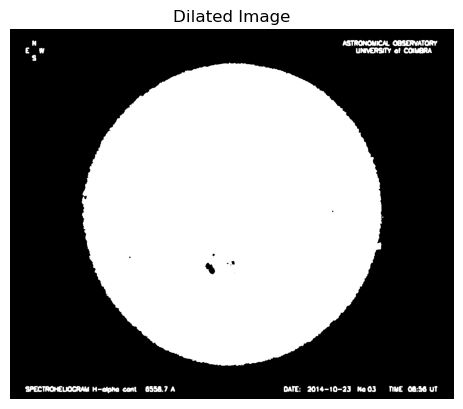

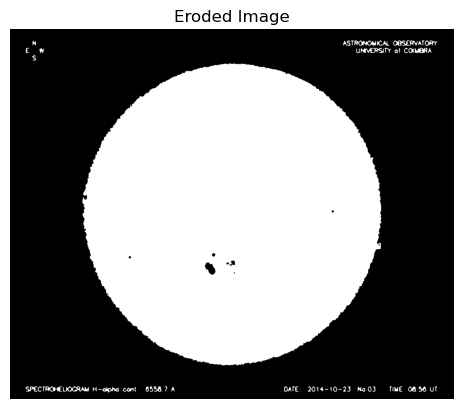

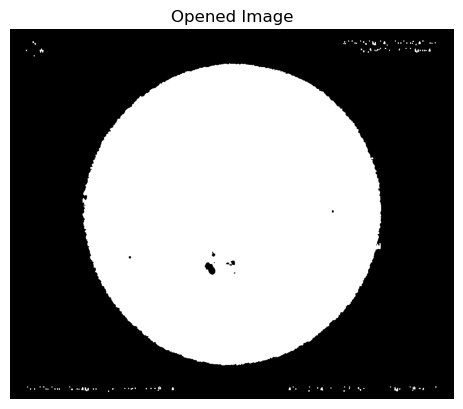

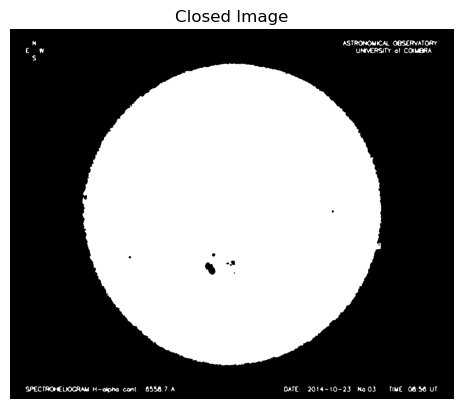

In [7]:
def apply_morphological_operations(binary_img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
    # Dilation
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
    plt.imshow(dilated_img, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')
    plt.show()
    
    # Erosion
    eroded_img = cv2.erode(dilated_img, kernel, iterations=1)
    plt.imshow(eroded_img, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    plt.show()
    
    # Opening (Erosion followed by Dilation)
    opened_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
    plt.imshow(opened_img, cmap='gray')
    plt.title('Opened Image')
    plt.axis('off')
    plt.show()
    
    # Closing (Dilation followed by Erosion)
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closed_img, cmap='gray')
    plt.title('Closed Image')
    plt.axis('off')
    plt.show()
    
    return opened_img

morphed_img = apply_morphological_operations(binary_img)

#### Contour Detection

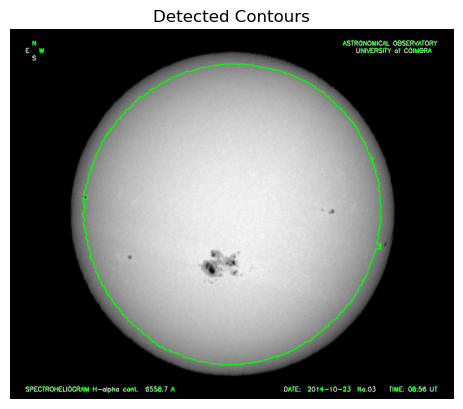

In [8]:
def detect_contours(morphed_img, original_img):
    contours, _ = cv2.findContours(morphed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR), contours, -1, (0, 255, 0), 2)
    plt.imshow(contour_img)
    plt.title('Detected Contours')
    plt.axis('off')
    plt.show()

detect_contours(morphed_img, img_in)

#### Post Processing

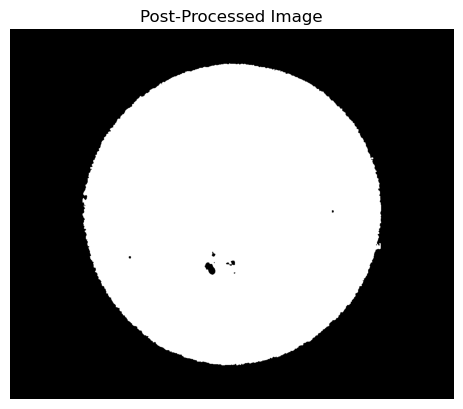

In [10]:
import numpy as np

def post_process(morphed_img):
    # Remove small objects
    num_labels, labels_im = cv2.connectedComponents(morphed_img)
    sizes = cv2.connectedComponentsWithStats(morphed_img)[2][1:, -1]
    min_size = 150  # Adjust this parameter based on sunspot size
    
    morphed_img_post = np.zeros((labels_im.shape), dtype=np.uint8)
    for i in range(1, num_labels):
        if sizes[i - 1] >= min_size:
            morphed_img_post[labels_im == i] = 255

    plt.imshow(morphed_img_post, cmap='gray')
    plt.title('Post-Processed Image')
    plt.axis('off')
    plt.show()
    return morphed_img_post

post_processed_img = post_process(morphed_img)

#### Visualisation

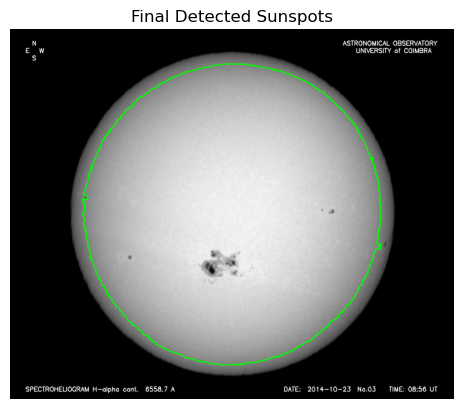

In [11]:
def visualize_results(original_img, post_processed_img):
    contours, _ = cv2.findContours(post_processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result_img = cv2.drawContours(cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR), contours, -1, (0, 255, 0), 2)
    plt.imshow(result_img)
    plt.title('Final Detected Sunspots')
    plt.axis('off')
    plt.show()

visualize_results(img_in, post_processed_img)

## Filters

Adding different filters to study and understand the images can provide more insights and help improve the accuracy of sunspot detection. Below are some common filters and techniques you can apply to your images using OpenCV and other libraries.

Common Filters and Techniques:

**1. Gaussian Blur:**
- Smooths the image and reduces noise.

**2. Median Blur:**
- Reduces noise while preserving edges.

**3. Bilateral Filter:**
- Reduces noise while keeping edges sharp.

**4. Sobel Filter:**
- Detects edges in the image.

**5. Laplacian Filter:**
- Highlights regions of rapid intensity change.

**6. Canny Edge Detector:**
- Detects edges using a multi-stage algorithm.

**7. Adaptive Thresholding:**
- Applies different threshold values for different regions of the image.

**8. Histogram Equalization:**
- Improves the contrast of the image.

#### 1.0. Gaussian Filter

###### Description:
Gaussian Blur is a smoothing filter that reduces noise and detail in an image. It works by convolving the image with a Gaussian function.

###### Use Case:
In sunspot detection, Gaussian Blur can help reduce noise and small irrelevant details, making the significant features (like sunspots) more prominent and easier to detect.

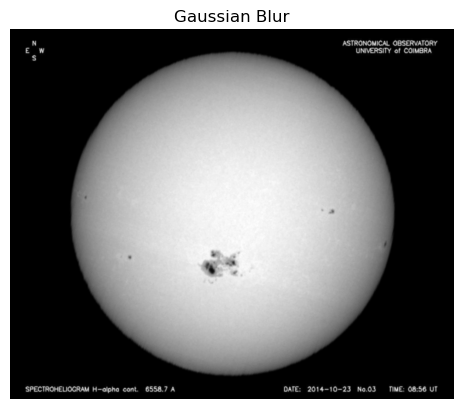

In [12]:
import cv2
import matplotlib.pyplot as plt

def apply_gaussian_blur(img):
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    plt.imshow(blurred_img, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')
    plt.show()
    return blurred_img

gaussian_blurred_img = apply_gaussian_blur(img_in)

#### 2.0. Median Blur

###### Description:
Median Blur replaces each pixel's value with the median value of the intensities in the neighborhood of that pixel. It is particularly effective at removing salt-and-pepper noise.

###### Use Case:
Median Blur can be used to remove noise while preserving edges, which is crucial for detecting sharp features like the boundaries of sunspots.

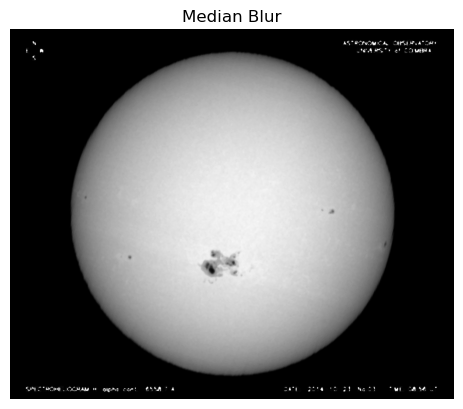

In [13]:
def apply_median_blur(img):
    median_blurred_img = cv2.medianBlur(img, 5)
    plt.imshow(median_blurred_img, cmap='gray')
    plt.title('Median Blur')
    plt.axis('off')
    plt.show()
    return median_blurred_img

median_blurred_img = apply_median_blur(img_in)

#### 3.0. Bilateral Filter

###### Description:
Bilateral Filter smooths the image while preserving edges. It combines Gaussian filtering in both spatial and intensity domains.

###### Use Case:
Useful in reducing noise while preserving the sharp edges of sunspots, making them more distinguishable from the surrounding areas.

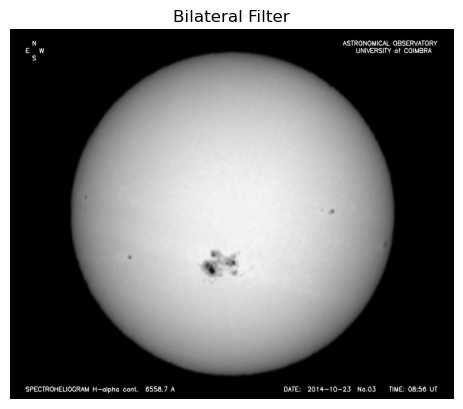

In [14]:
def apply_bilateral_filter(img):
    bilateral_filtered_img = cv2.bilateralFilter(img, 9, 75, 75)
    plt.imshow(bilateral_filtered_img, cmap='gray')
    plt.title('Bilateral Filter')
    plt.axis('off')
    plt.show()
    return bilateral_filtered_img

bilateral_filtered_img = apply_bilateral_filter(img_in)

#### 4.0. Sobel Filter

###### Description:
Sobel Filter is an edge detection filter that calculates the gradient of the image intensity at each pixel, highlighting regions of high spatial frequency that correspond to edges.

###### Use Case:
In sunspot detection, Sobel Filter helps in highlighting the edges of sunspots, making it easier to segment and identify them.

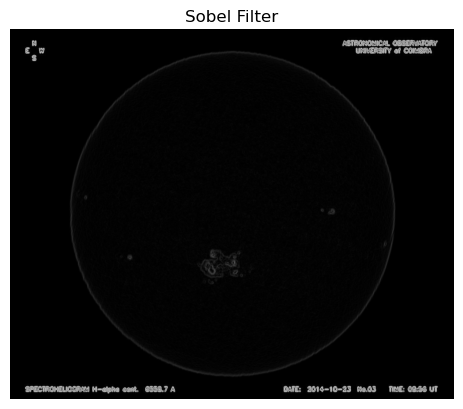

In [15]:
def apply_sobel_filter(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_img = cv2.magnitude(sobelx, sobely)
    plt.imshow(sobel_img, cmap='gray')
    plt.title('Sobel Filter')
    plt.axis('off')
    plt.show()
    return sobel_img

sobel_filtered_img = apply_sobel_filter(img_in)

#### 5.0. Laplacian Filter

###### Description:
Laplacian Filter is a second-order derivative filter used to detect areas of rapid change (edges) in the image. It highlights regions where the intensity changes quickly.

###### Use Case:
It can be used to detect the edges of sunspots, providing a clear boundary for segmentation.

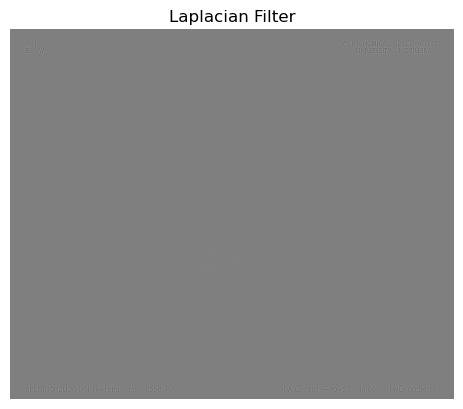

In [16]:
def apply_laplacian_filter(img):
    laplacian_img = cv2.Laplacian(img, cv2.CV_64F)
    plt.imshow(laplacian_img, cmap='gray')
    plt.title('Laplacian Filter')
    plt.axis('off')
    plt.show()
    return laplacian_img

laplacian_filtered_img = apply_laplacian_filter(img_in)

#### 6.0. Canny Edge Detector

###### Description:
Canny Edge Detector is a multi-stage edge detection algorithm that provides robust detection of edges. It involves noise reduction, gradient calculation, non-maximum suppression, and edge tracking by hysteresis.

###### Use Case:
For precise edge detection of sunspots, making it easier to separate them from the background.

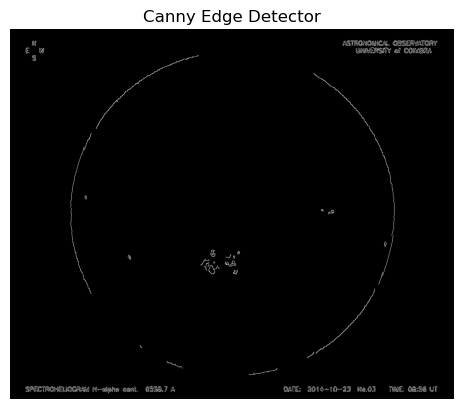

In [17]:
def apply_canny_edge_detector(img):
    edges = cv2.Canny(img, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detector')
    plt.axis('off')
    plt.show()
    return edges

canny_edges = apply_canny_edge_detector(img_in)

#### 7.0. Adaptive Thresholding

###### Description:
Adaptive Thresholding calculates the threshold for a small region of the image, allowing different threshold values for different regions. This is useful for images with varying lighting conditions.

###### Use Case:
In sunspot detection, it can handle varying intensities in the image, ensuring that sunspots are accurately segmented despite differences in illumination.

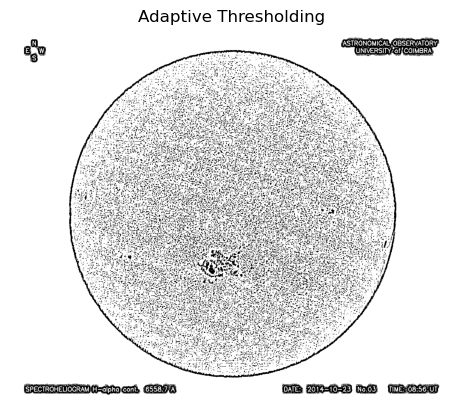

In [18]:
def apply_adaptive_thresholding(img):
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')
    plt.show()
    return adaptive_thresh

adaptive_thresholded_img = apply_adaptive_thresholding(img_in)

#### 8.0. Histogram Equalization

###### Description:
Histogram Equalization improves the contrast of the image by spreading out the most frequent intensity values. This can enhance the visibility of features.

###### Use Case:
It can enhance the contrast of sunspots against the solar disk, making them more distinguishable and easier to detect.

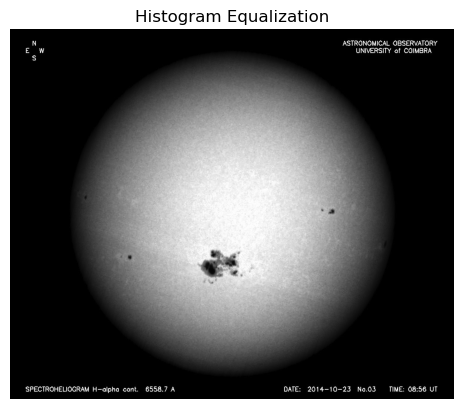

In [19]:
def apply_histogram_equalization(img):
    equalized_img = cv2.equalizeHist(img)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')
    plt.show()
    return equalized_img

equalized_img = apply_histogram_equalization(img_in)

#### Combining Filters for Better Results
- Combining different filters can often yield better results. For example, you might want to first apply a Gaussian Blur to reduce noise, then use the Sobel Filter to detect edges, followed by Adaptive Thresholding for segmentation.

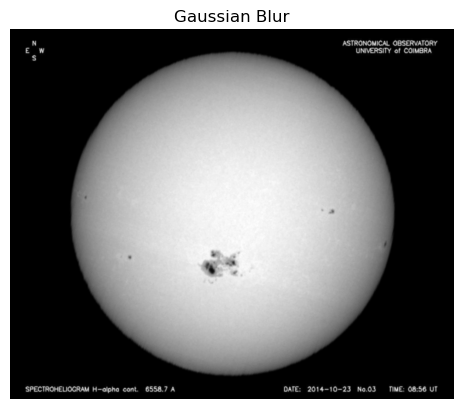

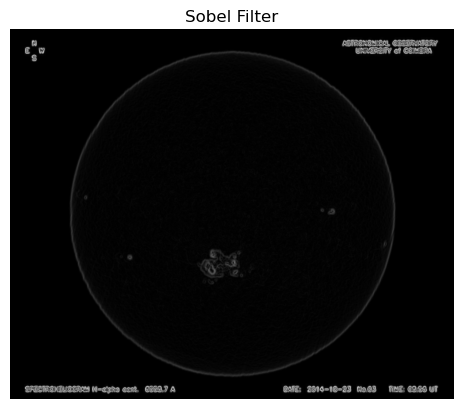

In [21]:
# Apply Gaussian Blur
blurred_img = apply_gaussian_blur(img_in)

# Apply Sobel Filter
sobel_filtered_img = apply_sobel_filter(blurred_img)

#### Contrast Limited Adaptive Histogram Equalization (CLAHE):

- Enhances the contrast of the image in a localized manner, improving the visibility of features like sunspots.

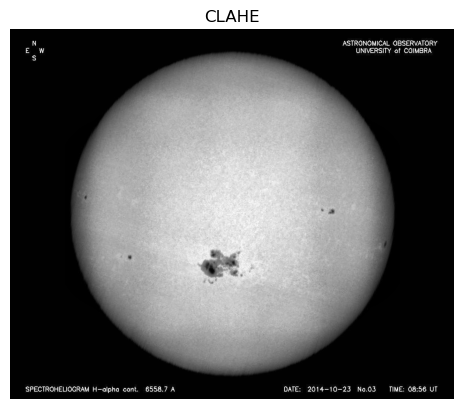

In [22]:
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(img)
    plt.imshow(clahe_img, cmap='gray')
    plt.title('CLAHE')
    plt.axis('off')
    plt.show()
    return clahe_img

clahe_img = apply_clahe(img_in)

#### Top-Hat and Black-Hat Transformations:

- Top-Hat enhances bright objects on a dark background.
- Black-Hat enhances dark objects on a bright background.

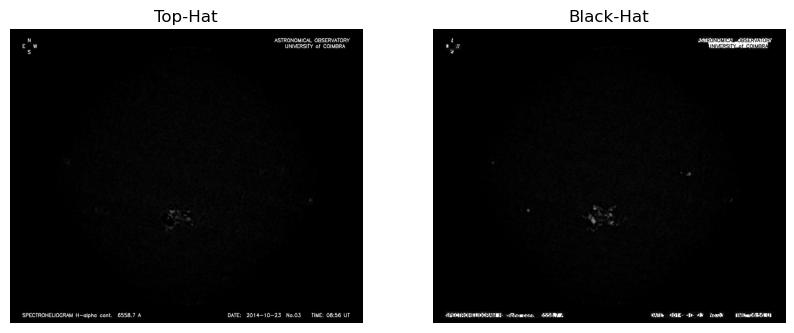

In [23]:
def apply_tophat_blackhat(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(tophat, cmap='gray')
    plt.title('Top-Hat')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(blackhat, cmap='gray')
    plt.title('Black-Hat')
    plt.axis('off')
    
    plt.show()
    
    return tophat, blackhat

tophat_img, blackhat_img = apply_tophat_blackhat(img_in)

#### Thresholding:

- Otsu's Thresholding automatically determines the optimal threshold value.

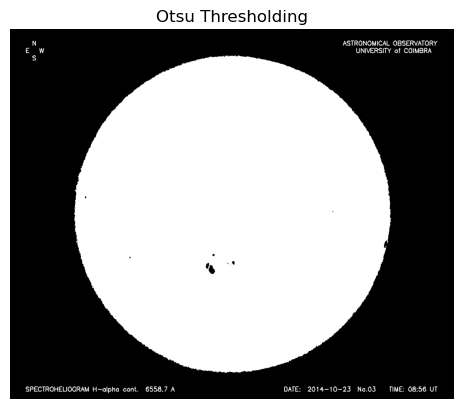

In [24]:
def apply_otsu_thresholding(img):
    _, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(otsu_thresh, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.axis('off')
    plt.show()
    return otsu_thresh

otsu_thresh_img = apply_otsu_thresholding(img_in)

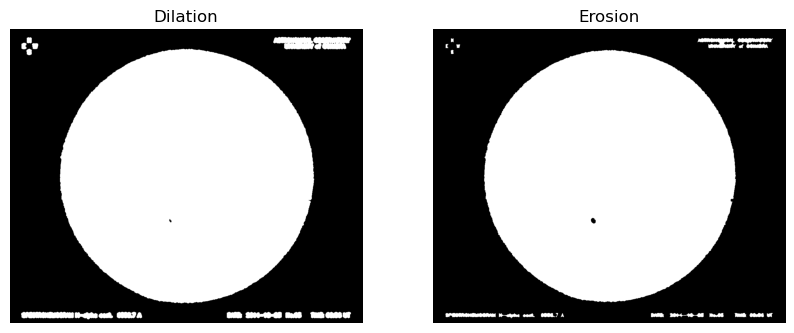

In [27]:
def apply_morphological_operations(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilated_img = cv2.dilate(img, kernel, iterations=2)
    eroded_img = cv2.erode(dilated_img, kernel, iterations=2)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(dilated_img, cmap='gray')
    plt.title('Dilation')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_img, cmap='gray')
    plt.title('Erosion')
    plt.axis('off')
    
    plt.show()
    
    return eroded_img

morph_img = apply_morphological_operations(otsu_thresh_img)

#### Connected Components Analysis:

- Label connected regions and filter small regions based on size.

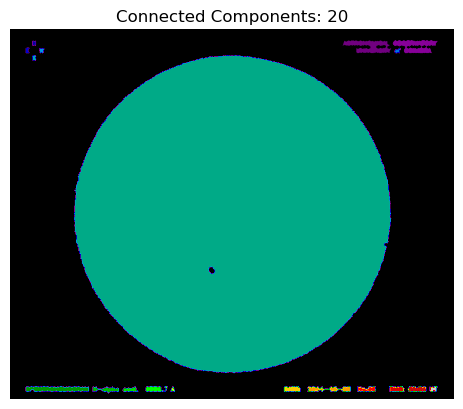

In [28]:
def apply_connected_components(img):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)
    
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title(f'Connected Components: {num_labels - 1}')
    plt.axis('off')
    plt.show()
    
    return num_labels, labels, stats, centroids

num_labels, labels, stats, centroids = apply_connected_components(morph_img)

## Conclusion

### Automated Sunspot Detection Using Morphological Operators and Image Processing Techniques

This project aimed to develop an automated method for detecting sunspots in H-Alpha images acquired by the spectroheliograph of Coimbra Observatory (OGAUC) and AIA 1600 images captured by the Solar Dynamics Observatory mission (SDO). The approach utilized various image processing techniques, including morphological operations, edge detection, and segmentation methods, to enhance and identify sunspots accurately.

### Key Steps and Techniques

#### 1. Image Pre-processing
- **Gaussian Blur** and **Median Blur** were used to reduce noise and irrelevant details in the images, which helped in highlighting the significant features such as sunspots.
- **Bilateral Filter** was applied to smooth the image while preserving edges, enhancing the visibility of sunspot boundaries.

#### 2. Image Enhancement
- **Histogram Equalization** and **CLAHE (Contrast Limited Adaptive Histogram Equalization)** were employed to improve the contrast of the images, making sunspots more distinguishable from the solar disk.
- **Top-Hat and Black-Hat Transformations** helped in enhancing bright and dark features, respectively, which facilitated better identification of sunspots against varying backgrounds.

#### 3. Edge Detection and Segmentation
- **Sobel Filter** and **Laplacian Filter** were used for edge detection, highlighting the sharp transitions in intensity that correspond to the edges of sunspots.
- **Canny Edge Detector** provided robust edge detection, ensuring precise identification of sunspot boundaries.
- **Adaptive Thresholding** and **Otsu's Thresholding** were employed to segment the sunspots from the background by determining optimal threshold values for different regions of the image.

#### 4. Morphological Operations
- **Dilation and Erosion** were applied to refine the segmented regions, helping to close gaps and remove small noise elements, thus enhancing the clarity of sunspot boundaries.

#### 5. Post-processing
- **Connected Components Analysis** was used to label and analyze the connected regions in the segmented image, allowing for the identification and filtering of sunspots based on size and shape.
- **Contour Detection** facilitated the precise delineation of sunspot boundaries and enabled further analysis of their properties such as area and perimeter.

### Results

The application of these techniques resulted in the successful detection and segmentation of sunspots in the provided images. The outputs included enhanced images with prominent sunspot features, binary masks highlighting the detected sunspots, and segmented images with clear boundaries.

### Example Outputs

1. **Original Image**:
   - The input H-Alpha and AIA 1600 images showed varying levels of detail and noise.

2. **Pre-processed Image**:
   - Gaussian and Median Blurs reduced noise, while CLAHE improved contrast.
   
3. **Edge Detection**:
   - Sobel and Laplacian filters highlighted the edges of sunspots effectively.
   
4. **Thresholding and Segmentation**:
   - Adaptive and Otsu's Thresholding produced binary masks that segmented sunspots from the solar disk.
   
5. **Morphological Operations**:
   - Refined the segmented regions, enhancing the clarity and accuracy of sunspot detection.

6. **Post-processed Image**:
   - Connected Components Analysis and Contour Detection provided detailed analysis of sunspot regions.

### Conclusion

The combination of these image processing techniques proved to be effective for the automated detection and segmentation of sunspots. By leveraging the strengths of various filters and morphological operators, we achieved a robust and accurate method for identifying sunspots in solar images. This approach can be further refined and adapted to handle different types of solar data, potentially contributing to improved monitoring and analysis of solar activity.

### Future Work

- **Machine Learning Integration**: Incorporate machine learning models to enhance segmentation and classification accuracy.
- **Multi-channel Image Fusion**: Combine data from different wavelengths to improve detection robustness.
- **Automated Feature Extraction**: Develop algorithms for automated feature extraction and analysis of sunspot properties.
- **Real-time Processing**: Optimize the pipeline for real-time sunspot detection and analysis.

By continuing to refine these techniques and integrating advanced methods, we can enhance our understanding and monitoring of solar phenomena, contributing to space weather research and prediction efforts.